<a href="https://colab.research.google.com/github/Debora-Ibarra/Repositorio_EDP2/blob/main/Clank_Nicolson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Método implícito Clank-Nicolson

Resolvemos la ecuación del calor:
$$\frac{\partial u}{\partial t} = \frac{\partial^2 u}{\partial x^2}$$

sujeta a las condiciones de frontera:
$$u(0,t)=u(1,t)=0, \;\;\; t>0$$
Y la condición inicial:
$$u(x,0)=f (x),\;\;\;0<x<1$$


En este caso particular:
$$f(x)=1-4(x- \frac{1}{2})^2$$
Y no nos dan h y k (creo)
Hay que calcularlo
$$h=\frac{1}{10}=0.10,\ k=$$


La solución exacta es:

$$
u(x,t)=\frac{32}{\pi^{3}}
\sum_{k=0}^{\infty}
\frac{e^{-(2k+1)^{2}\pi^{2}t}}{(2k+1)^{3}}
\sin\!\big((2k+1)\pi x\big).$$


Calculamos los coeficientes que apareceran en la matriz con la siguiente ecuación:
**Poner la que es**
$$u_{i, j-1} = 3u_{i, j} - u_{i+1, j} - u_{i-1, j}$$

In [3]:
import sympy as sp #libreria para realizar calculo simbólico
import numpy as np #libreria para trabajar arreglos y matrices
import matplotlib.pyplot as plt #libreria para gráficar
from mpl_toolkits.mplot3d import Axes3D #libreria para graficar en 3D
from matplotlib import cm #libreria para graficar en 3D
from tabulate  import tabulate

In [4]:
def f(x):
  return 1-4*(x-0.5)**2

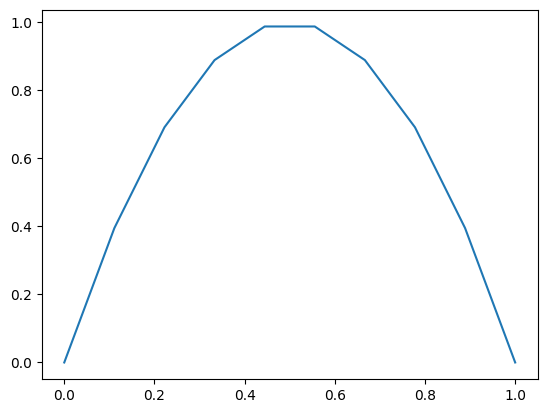

In [5]:
x=np.linspace(0,1,10)
plt.plot(x,f(x))

In [6]:
def tridiagonal(n,a,b):
  return sp.Matrix([
      [a if i==j else b if abs(i-j)== 1 else 0 for j in range(n)]
      for i in range(n)
  ])


In [7]:
r=1

In [8]:
A= tridiagonal(9, 2+2*r,-r)

In [9]:
A

Matrix([
[ 4, -1,  0,  0,  0,  0,  0,  0,  0],
[-1,  4, -1,  0,  0,  0,  0,  0,  0],
[ 0, -1,  4, -1,  0,  0,  0,  0,  0],
[ 0,  0, -1,  4, -1,  0,  0,  0,  0],
[ 0,  0,  0, -1,  4, -1,  0,  0,  0],
[ 0,  0,  0,  0, -1,  4, -1,  0,  0],
[ 0,  0,  0,  0,  0, -1,  4, -1,  0],
[ 0,  0,  0,  0,  0,  0, -1,  4, -1],
[ 0,  0,  0,  0,  0,  0,  0, -1,  4]])

In [10]:
B=tridiagonal(9,2-2*r,r)

In [11]:
B

Matrix([
[0, 1, 0, 0, 0, 0, 0, 0, 0],
[1, 0, 1, 0, 0, 0, 0, 0, 0],
[0, 1, 0, 1, 0, 0, 0, 0, 0],
[0, 0, 1, 0, 1, 0, 0, 0, 0],
[0, 0, 0, 1, 0, 1, 0, 0, 0],
[0, 0, 0, 0, 1, 0, 1, 0, 0],
[0, 0, 0, 0, 0, 1, 0, 1, 0],
[0, 0, 0, 0, 0, 0, 1, 0, 1],
[0, 0, 0, 0, 0, 0, 0, 1, 0]])

In [12]:
b=sp.Matrix([f(0.1*(i+1)) for i in range(9)])

In [13]:
b

Matrix([
[0.36],
[0.64],
[0.84],
[0.96],
[ 1.0],
[0.96],
[0.84],
[0.64],
[0.36]])

In [14]:
def crank_nicolson(A,B,b,j):
  b_1=B*b
  S=[]
  for i in range(j):
    sol=A.LUsolve(b_1)
    S.append(sol.T)
    b_1=B*sol

  return sp.Matrix(S)

In [15]:
j=50

In [16]:
U=crank_nicolson(A,B,b,j)

In [17]:
data =[list(U.row(i)) for i in range (5)]

print(tabulate(data, tablefmt="grid"))

+----------+----------+----------+----------+----------+----------+----------+----------+----------+
| 0.301436 | 0.565746 | 0.761547 | 0.880442 | 0.920221 | 0.880442 | 0.761547 | 0.565746 | 0.301436 |
+----------+----------+----------+----------+----------+----------+----------+----------+----------+
| 0.26763  | 0.504776 | 0.688489 | 0.802994 | 0.841718 | 0.802994 | 0.688489 | 0.504776 | 0.26763  |
+----------+----------+----------+----------+----------+----------+----------+----------+----------+
| 0.23989  | 0.454784 | 0.623126 | 0.729952 | 0.766473 | 0.729952 | 0.623126 | 0.454784 | 0.23989  |
+----------+----------+----------+----------+----------+----------+----------+----------+----------+
| 0.21645  | 0.411015 | 0.564592 | 0.662619 | 0.696285 | 0.662619 | 0.564592 | 0.411015 | 0.21645  |
+----------+----------+----------+----------+----------+----------+----------+----------+----------+
| 0.195788 | 0.372138 | 0.511722 | 0.601117 | 0.631868 | 0.601117 | 0.511722 | 0.372138 | 0

In [18]:
U_np=np.array(U.tolist(),dtype=float)

In [19]:
x = np.linspace(0, 1, 9)
y = np.linspace(0, 0.5, j)
X, Y = np.meshgrid(x, y)

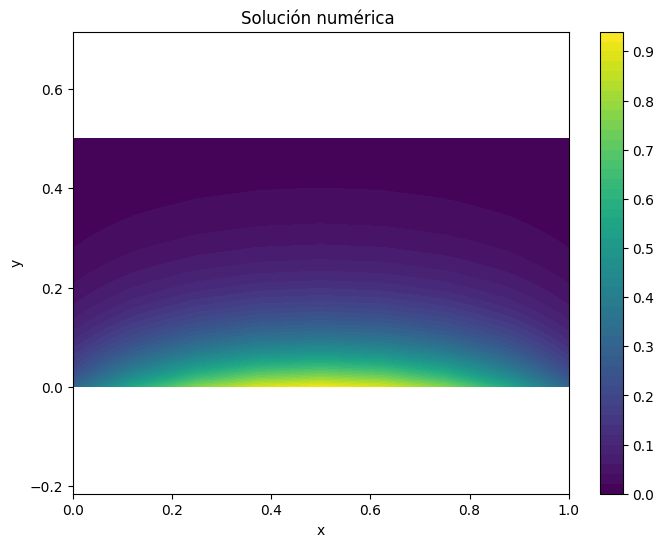

In [20]:
# Mapa de colores
plt.figure(figsize=(8, 6))
contour = plt.contourf(X, Y, U_np, levels=50, cmap=cm.viridis)
plt.colorbar(contour)
plt.title('Solución numérica ')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.show()

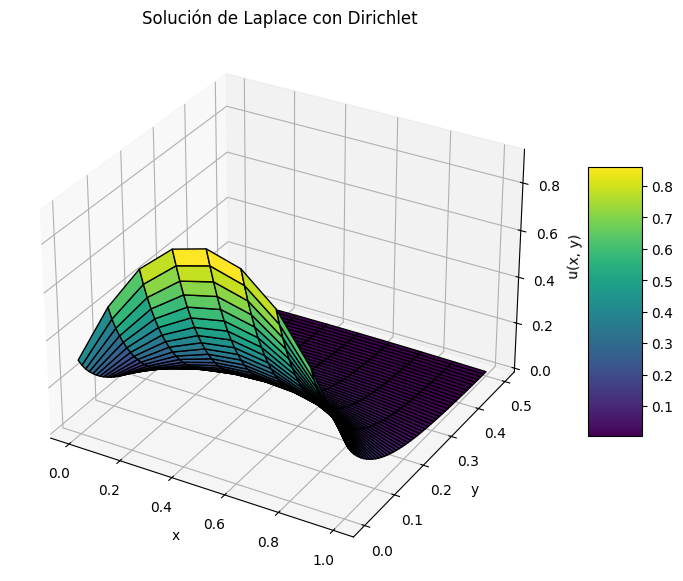

In [21]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, U_np, cmap=cm.viridis, edgecolor='k')
ax.set_title('Solución de Laplace con Dirichlet')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u(x, y)')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()


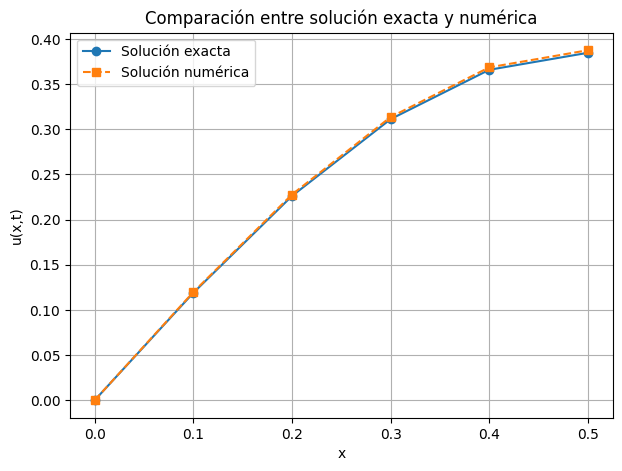


Norma L-infinito: 0.0028525142626079636
Norma L2 : 0.004887051420186995


In [29]:
def u_exact(x, t, N=100):
    s = np.zeros_like(x, dtype=float)
    for k in range(N):
        n = 2*k + 1
        s += np.exp(-n**2 * np.pi**2 * t) * (1/n**3) * np.sin(n*np.pi*x)
    return (32/np.pi**3) * s
x = np.array([0.0, 0.1, 0.2, 0.3, 0.4, 0.5])
t = 0.10   #como en la tabla

u_real = u_exact(x, t)
# ---

u_num = np.array([0.0, 0.1197, 0.2277, 0.3135, 0.3685, 0.3875])

plt.figure(figsize=(7,5))
plt.plot(x, u_real, 'o-', label='Solución exacta')
plt.plot(x, u_num, 's--', label='Solución numérica')
plt.xlabel('x')
plt.ylabel('u(x,t)')
plt.title('Comparación entre solución exacta y numérica')
plt.legend()
plt.grid(True)
plt.show()

error = np.abs(u_real - u_num)


print("\nNorma L-infinito:", np.max(error))
print("Norma L2 :", np.sqrt(np.sum(error**2)))